<a href="https://colab.research.google.com/github/luizfreire96/Szeged-Weather-linear-regression/blob/main/Weather_in_Szeged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather in Szeged

In this notebook we will try to create a model that predict the temperature and apparent temperature with linear regression.
Initially with simple linear regression, then we will try to put more variables.

# Checking the data

First of all we will import the libraries, data and take a brief look at the data.

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Weather in Szeged/weatherHistory.csv')

In [49]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


The time should be a parameter that have a strong correlation with temperature, let's use the month and the hour.

In [50]:
df['Hour'] = df['Formatted Date'].str.slice(start=11, stop=13, step=1).astype(float)
df['Month'] = df['Formatted Date'].str.slice(start=5, stop=7, step=1).astype(float)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Hour,Month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0.0,4.0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,1.0,4.0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2.0,4.0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,3.0,4.0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4.0,4.0


In [51]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Hour,Month
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,11.500327,6.523799
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,6.922081,3.448495
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,6.000000,4.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,12.000000,7.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,18.000000,10.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,23.000000,12.000000


In order to select which data we will use to predict, look at the correlation is important

In [52]:
df = df.drop(columns='Loud Cover')
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Hour,Month
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447,0.170134,0.149110
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219,0.160574,0.158522
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.285991,0.056429
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263,0.067615,-0.098950
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651,-0.003983,-0.019092
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818,0.004951,-0.071159
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000,0.000335,-0.019118
Hour,0.170134,0.160574,-0.285991,0.067615,-0.003983,0.004951,0.000335,1.000000,-0.000311
Month,0.149110,0.158522,0.056429,-0.098950,-0.019092,-0.071159,-0.019118,-0.000311,1.000000


The two correlation that looks siginficant to predict the temperature and apparent temperature are Humidity and Visibility.

Text(0.5, 1.0, ' Temperature  x Humidity')

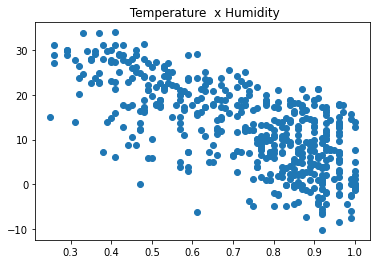

In [53]:
dfsample = df.sample(500)
plt.scatter(dfsample['Humidity'], dfsample['Temperature (C)'])
plt.title(' Temperature  x Humidity')

Text(0.5, 1.0, ' Temperature  x Visibility')

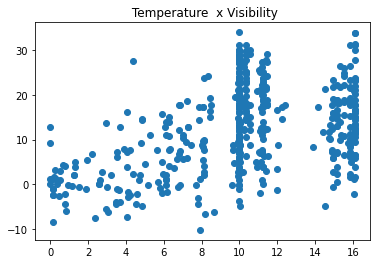

In [54]:
plt.scatter(dfsample['Visibility (km)'], dfsample['Temperature (C)'])
plt.title(' Temperature  x Visibility')

# Splitting and training the simple linear regression

In [55]:
X = df['Humidity']
y = df['Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [56]:
LR = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
predict = LR.predict(X_test.values.reshape(-1, 1))

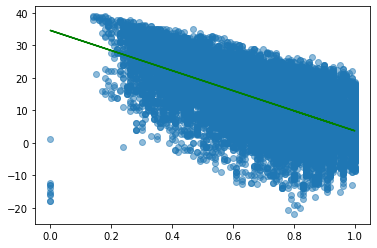

In [57]:
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, predict, color='g')

In [58]:
LR.score(X_test.values.reshape(-1, 1), y_test.values)

0.40040472046870645

Lets try including the visibility

In [64]:
X2 = df[['Visibility (km)', 'Humidity']]

In [66]:
X2_train, X2_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [72]:
LR = LinearRegression().fit(X2_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
predict2 = LR.predict(X2_test.values.reshape(-1, 1))

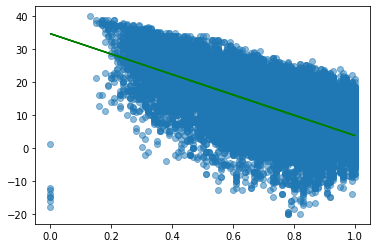

In [73]:
plt.scatter(X2_test, y_test, alpha=0.5)
plt.plot(X2_test, predict2, color='g')

In [74]:
LR.score(X2_test.values.reshape(-1, 1), y_test.values)

0.401719617078915

Last try with hour and month

In [76]:
X4 = df[['Humidity', 'Visibility (km)', 'Hour', 'Month']]

In [77]:
X4_train, X4_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [80]:
LR = LinearRegression().fit(X4_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
predict4 = LR.predict(X4_test.values.reshape(-1, 1))

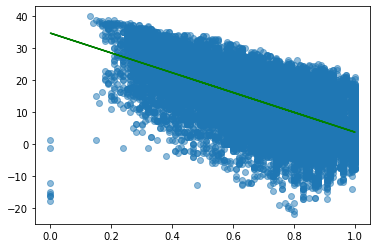

In [81]:
plt.scatter(X4_test, y_test, alpha=0.5)
plt.plot(X4_test, predict4, color='g')

In [83]:
LR.score(X4_test.values.reshape(-1, 1), y_test.values)

0.3998991547128192